<a href="https://colab.research.google.com/github/Zabala2612/PROYECTO-NO-SUPERVISADO/blob/main/Copia_de_Analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<div align="center">
<table>
    <thead>
        <tr>
            <td rowspan="3">
                <img alt="UdeA" height="200px" src="https://raw.githubusercontent.com/juliancastillo-udea/2024-1-ProgramacionPosgrados/main/images/Escudo-UdeA.svg" hspace="10px" vspace="0px">
            </td>
            <td>
                <h1><b>FACULTAD DE INGENIERÍA -
DEPARTAMENTO DE INGENIERÍA INDUSTRIAL</b></h1>
            </td>
             </tr>
              <td>
                <h1><b>ANALÍTICA PARA LA TOMA DE DECISIONES</b></h1>
            </td>
        <tr>
            <td>
                <h1><b> Redes Neuronales Artificiales: Modelos de riesgo de crédito en un concesionario</b></h1>
            </td>
        </tr>
        <tr>
        
            
    
    
</table>

</div>

<hr size=10 noshade color="green">


<div align="left">

<h2> <b> Por: Juan David Zabala Chaparro. </b> </h2>
<a href="mailto:juan.zabala2@udea.edu.co"> ✉ Juan David Zabala Chaparro </a>


</div>

<br>

\# <font color='056938'> **Descripción del Dataset** </font>

El conjunto de datos utilizado en el Taller de Redes Neuronales Artificiales: Modelos de riesgo de crédito en un concesionario contiene información histórica de solicitudes de crédito para vehículos. Incluye variables demográficas, financieras y crediticias usadas para evaluar el riesgo de incumplimiento.
El objetivo general es desarrollar modelos de clasificación capaces de predecir el riesgo de mora, analizando el perfil de los clientes y evaluando el desempeño bajo condiciones reales de desbalance de clases.

| **Columna**                | **Descripción**                                                                               |
| -------------------------- | --------------------------------------------------------------------------------------------- |
| **Caso**                   | Identificador único de cada cliente o solicitud.                                              |
| **Perfil**                 | Segmento o categoría del cliente según criterios del concesionario.                           |
| **Estado**                 | Estado civil o situación personal del solicitante.                                            |
| **Edad**                   | Edad del cliente en años.                                                                     |
| **Genero**                 | Género reportado.                                                                             |
| **ScoreCrediticio**        | Puntaje crediticio asignado por el buró.                                                      |
| **PorcentajeFinanciacion** | Porcentaje del valor del vehículo solicitado en financiamiento.                               |
| **Plazo**                  | Duración del crédito en meses.                                                                |
| **IngresoEstimado**        | Ingreso mensual estimado del cliente.                                                         |
| **Gastos**                 | Gastos mensuales declarados.                                                                  |
| **CapacidadDePago**        | Resta entre ingresos y gastos, indicador de solvencia.                                        |
| **ValorCuotaMensual**      | Cuota mensual aproximada del crédito.                                                         |
| **M3_30AC**                | Variable objetivo (1 = incumplió, 0 = cumplió). Indica mora >30 días en los primeros 3 meses. |


**Objetivo del Análisis**




---

El análisis de este dataset tiene como propósito principal predecir el riesgo de incumplimiento por parte de los clientes, permitiendo anticipar comportamientos de mora en los primeros meses del crédito. Para ello, se busca identificar cuáles variables del perfil financiero y demográfico del solicitante influyen de manera más significativa en su comportamiento de pago. Con esta información, se evaluarán distintos modelos de clasificación —como Redes Neuronales, Árboles de Decisión y Regresión Logística— con el fin de comparar su capacidad predictiva y determinar cuál se ajusta mejor al problema. Dado que este tipo de escenarios suele presentar un marcado desbalance de clases, el análisis también contempla técnicas para manejar esta condición y mejorar la estabilidad de los modelos. Finalmente, el desempeño se medirá mediante métricas especializadas como accuracy, precision, recall, F1-score y el área bajo la curva ROC–AUC, asegurando una evaluación integral y robusta del modelo.


# <font color='056938'> **Importar librerias** </font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# <font color='056938'> **Carga del dataset** </font>

In [ ]:
df = pd.read_excel('https://github.com/vgonzalezg0/Entrega3_Analitica3/raw/71584069a01abd67e1ed8d769ebf92dd99eff6f6/BD%20taller%20clasificacio%CC%81n-2.xlsx')
df.sample(10)

,Caso,Perfil,Estado,Edad,Genero,ScoreCrediticio,PorcentajeFinanciacion,Plazo,IngresoEstimado,Gastos,CapacidadDePago,ValorCuotaMensual,M3_30AC
5678,1005932099,ASALARIADO,NUEVO,69,MASCULINO,876,0.3231,72,27463932.0,9017587.42,20.410441,903770,0
6948,1005992555,ASALARIADO,USADO,74,FEMENINO,775,0.5588,24,1751379.0,585320.12,1.142576,1020553,0
12122,1006234325,ASALARIADO,NUEVO,68,FEMENINO,937,0.8658,60,0.0,3360011.63,-1.530390,2195527,0
4169,1005855154,INDEPENDIENTE,NUEVO,42,FEMENINO,880,0.6195,60,3707835.0,1570578.82,1.547011,1381539,0
15202,1006415953,INDEPENDIENTE,USADO,30,MASCULINO,796,1.0000,72,3322560.0,1103811.51,1.351621,1641546,0
11063,1006182637,INDEPENDIENTE,NUEVO,50,MASCULINO,812,0.2198,36,2144219.0,689659.98,2.479111,586726,0
8776,1006079271,ASALARIADO,NUEVO,70,FEMENINO,975,0.2994,60,2933674.0,820725.80,3.342902,632070,0
13747,1006325441,INDEPENDIENTE,USADO,43,MASCULINO,820,1.0000,60,1625760.0,1338013.55,0.247993,1160301,0
19631,1006682100,ASALARIADO,NUEVO,55,MASCULINO,833,0.8986,60,3706028.0,1610306.89,1.434110,1461339,0
4979,1005896698,INDEPENDIENTE,USADO,32,MASCULINO,774,0.4444,60,8452515.0,6332651.67,1.828900,1159092,0


# <font color='056938'> **Análisis Exploratorio de Datos (EDA)** </font>

**1. Descripción inicial de la base de datos**

In [ ]:
# Información general del dataset
print("\nInformación del dataset:")
df.info()

# Revisar datos faltantes o nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())

# Porcentaje de valores nulos
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().mean() * 100).round(2))


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21091 entries, 0 to 21090
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Caso                    21091 non-null  int64  
 1   Perfil                  21091 non-null  object 
 2   Estado                  21091 non-null  object 
 3   Edad                    21091 non-null  int64  
 4   Genero                  21091 non-null  object 
 5   ScoreCrediticio         21091 non-null  int64  
 6   PorcentajeFinanciacion  21091 non-null  float64
 7   Plazo                   21091 non-null  int64  
 8   IngresoEstimado         21063 non-null  float64
 9   Gastos                  21091 non-null  float64
 10  CapacidadDePago         21063 non-null  float64
 11  ValorCuotaMensual       21091 non-null  int64  
 12  M3_30AC                 21091 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 2.1+ MB

Cantida

El dataset utilizado para el modelado del riesgo de crédito en el concesionario está compuesto por 21.091 registros y 13 variables, que incluyen información sociodemográfica, financiera y de comportamiento crediticio de los solicitantes. Las variables abarcan datos como el tipo de perfil laboral, edad, puntaje crediticio, nivel de ingresos, gastos, capacidad de pago y el indicador de riesgo M3_30AC, que funciona como la variable objetivo del modelo al señalar si el cliente presentó moras significativas en los primeros tres meses.
En cuanto a la composición del dataset, la mayoría de las variables son numéricas, con seis columnas de tipo entero y cuatro de tipo flotante, mientras que tres variables son categóricas: Perfil, Estado y Género. Este balance entre variables numéricas y categóricas es adecuado para modelos basados en redes neuronales, ya que permite capturar tanto patrones cuantitativos como cualitativos del comportamiento financiero de los clientes.
Respecto a la calidad de los datos, el dataset presenta un nivel muy bajo de valores faltantes: solo dos columnas contienen nulos, IngresoEstimado y CapacidadDePago, ambas con un 0,13 % de registros vacíos (28 valores cada una). Este porcentaje es mínimo y no compromete la integridad del análisis, por lo que las estrategias de imputación necesarias serán simples y de bajo impacto. El resto de las columnas se encuentra completamente completo, lo cual es positivo para garantizar la estabilidad y confiabilidad de los modelos de aprendizaje automático.
En general, el dataset presenta una estructura ordenada, sin problemas significativos de calidad, y contiene variables relevantes para el desarrollo de modelos de riesgo de crédito basados en redes neuronales artificiales. Esto permite avanzar a etapas posteriores como la exploración inicial, el preprocesamiento y la preparación de los datos para entrenamiento del modelo.

**2. Análisis estadístico de las variables numéricas**

In [ ]:
# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64'])

print("\nEstadísticas descriptivas de variables numéricas:")
display(num_cols.describe().T)  # T para transponer y que sea más legible


Estadísticas descriptivas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Caso,21091.0,1.006177e+09,3.264523e+05,1.004992e+09,1.005912e+09,1.006159e+09,1.006453e+09,1.006786e+09
Edad,21091.0,4.454914e+01,1.274779e+01,1.900000e+01,3.400000e+01,4.300000e+01,5.400000e+01,7.500000e+01
ScoreCrediticio,21091.0,7.823708e+02,8.533241e+01,3.430000e+02,7.260000e+02,7.830000e+02,8.380000e+02,9.990000e+02
PorcentajeFinanciacion,21091.0,7.435177e-01,2.466270e-01,1.000000e-01,5.522500e-01,8.000000e-01,1.000000e+00,1.067000e+00
Plazo,21091.0,6.063226e+01,1.249591e+01,1.200000e+01,6.000000e+01,6.000000e+01,7.200000e+01,8.400000e+01
IngresoEstimado,21063.0,5.018901e+06,5.955286e+06,0.000000e+00,1.596674e+06,2.985320e+06,5.797367e+06,3.480000e+07
Gastos,21091.0,1.141223e+08,1.623579e+10,3.685310e+05,1.090507e+06,1.672997e+06,2.736073e+06,2.357884e+12
CapacidadDePago,21063.0,-8.077237e+01,1.198892e+04,-1.739961e+06,2.454135e-01,9.132229e-01,2.150520e+00,1.207657e+02
ValorCuotaMensual,21091.0,1.703957e+06,8.595178e+05,1.500000e+05,1.158444e+06,1.557124e+06,2.062300e+06,1.861680e+07
M3_30AC,21091.0,3.968517e-02,1.952231e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


El análisis descriptivo de las variables numéricas del dataset permite identificar el comportamiento general de los datos y detectar posibles anomalías o características relevantes para el modelado del riesgo de crédito.
En primer lugar, variables como Caso funcionan únicamente como identificadores y no aportan información analítica para el modelo. Su distribución homogénea confirma que no se repetirán valores y que la base está correctamente indexada.
La variable Edad presenta una media de 44,5 años, con una desviación estándar moderada, lo que indica una población adulta relativamente diversa. El rango oscila entre los 19 y los 75 años, lo cual es coherente con el mercado típico de crédito para vehículos.
El Score Crediticio muestra una distribución concentrada en valores altos: la media es de 782 puntos y el 75 % de los clientes se ubica por encima de 838 puntos. Esto sugiere que la mayoría de solicitantes tiene un buen historial financiero, algo común en concesionarios donde la aprobación crediticia depende en gran medida de este indicador. Sin embargo, también existe un rango amplio, desde 343 hasta 999 puntos, lo que puede enriquecer los patrones aprendidos por el modelo.
En cuanto al Porcentaje de Financiación, el promedio es del 74 %, con valores que van desde el 10 % hasta un poco más del 100 %. Aunque la mayoría de los clientes financia entre el 55 % y el 100 % del vehículo, valores mayores al 100 % indican posibles casos atípicos, posiblemente por refinanciaciones o costos adicionales incluidos en la financiación.
La variable Plazo también es bastante estable: la mayoría de los créditos se otorga a 60 meses, que coincide con los percentiles 25, 50 y 75. El rango completo va de 12 a 84 meses, mostrando que el concesionario ofrece flexibilidad, aunque la preferencia dominante es el plazo estándar de 5 años.
En las variables financieras aparecen comportamientos importantes. IngresoEstimado tiene una alta dispersión: la media es de aproximadamente 5 millones, pero el máximo alcanza 34,8 millones, lo que evidencia una distribución sesgada hacia valores altos. Este comportamiento es típico en datos de ingresos, donde existen pocos clientes con altos niveles salariales y muchos en niveles medios.
El caso más llamativo es la variable Gastos, cuyo valor máximo es extremadamente alto (2,35 billones), lo que claramente representa un outlier o un error de captura. La desviación estándar también es muy elevada, lo que confirma que estos valores extremos afectan significativamente la distribución. Será necesario revisar, corregir o tratar estos datos para evitar que distorsionen el entrenamiento del modelo.
La Capacidad de Pago refleja un comportamiento atípico similar: aunque la mediana es cercana a 1, existen valores negativos muy grandes que no tienen sentido financiero (por ejemplo, –1.739.961). Esto sugiere errores de cálculo o registros corruptos que requerirán depuración o imputación.
El Valor de la Cuota Mensual se distribuye de manera coherente, con una media de 1,7 millones y un rango que refleja la diversidad de montos financiados. Sin embargo, el valor máximo (18,6 millones) también sugiere la presencia de algunos créditos atípicos o de montos extraordinariamente altos.
Finalmente, la variable objetivo M3_30AC evidencia un fuerte desbalance de clases: su media es de 0,039, lo que indica que solo el 3,9 % de los clientes presenta moras significativas. Este comportamiento es típico en datasets de riesgo crediticio, pero implica la necesidad de aplicar técnicas de balanceo para evitar que el modelo se incline hacia la clase mayoritaria.
En conjunto, las estadísticas descriptivas muestran que, aunque la base de datos es amplia y contiene información valiosa, también presenta valores extremos y posibles errores que deberán ser tratados cuidadosamente durante el preprocesamiento para garantizar la calidad del modelo de redes neuronales.

In [ ]:
# ============================
# 1. Dummies para Perfil
# ============================
df = pd.get_dummies(df, columns=["Perfil"], drop_first=True)

# ============================
# 2. Dummies para Estado del carro
# ============================
df = pd.get_dummies(df, columns=["Estado"], drop_first=True)

# ============================
# 3. Dummies para Género
# ============================
df = pd.get_dummies(df, columns=["Genero"], drop_first=True)

# ============================
# Verificación final
# ============================
print("Columnas después del preprocesamiento:")
print(df.columns)

df.head()

Columnas después del preprocesamiento:
Index(['Caso', 'Edad', 'ScoreCrediticio', 'PorcentajeFinanciacion', 'Plazo',
       'IngresoEstimado', 'Gastos', 'CapacidadDePago', 'ValorCuotaMensual',
       'M3_30AC', 'Perfil_INDEPENDIENTE', 'Estado_USADO', 'Genero_MASCULINO'],
      dtype='object')


,Caso,Edad,ScoreCrediticio,PorcentajeFinanciacion,Plazo,IngresoEstimado,Gastos,CapacidadDePago,ValorCuotaMensual,M3_30AC,Perfil_INDEPENDIENTE,Estado_USADO,Genero_MASCULINO
0,1004991730,30,748,0.6850,72,3289800.0,2430508.51,0.361093,2379693,0,False,False,False
1,1005097331,46,670,0.2783,60,2425440.0,1621788.08,0.948770,847046,0,True,False,True
2,1005120587,39,752,1.0000,60,30000000.0,3614018.63,12.009213,2197145,0,True,True,True
3,1005152562,38,758,1.0000,84,1631331.0,1725244.99,-0.068706,1366896,0,False,True,False
4,1005153782,60,846,0.6596,72,20907400.0,3439341.88,13.004595,1343222,0,True,False,False


Tras aplicar el proceso de limpieza, transformación y preparación de variables para el modelo de redes neuronales, el dataset quedó conformado por 13 columnas, que incluyen tanto variables numéricas originales como variables categóricas transformadas mediante one-hot encoding. El objetivo de este preprocesamiento es dejar la información en un formato totalmente numérico y escalable, adecuado para los algoritmos de aprendizaje automático.
Las columnas finales son:
Variables numéricas originales:
Caso, Edad, ScoreCrediticio, PorcentajeFinanciacion, Plazo, IngresoEstimado, Gastos, CapacidadDePago, ValorCuotaMensual.
Variable objetivo:
M3_30AC, que indica si el cliente incurrió o no en mora a 30 días en los primeros tres meses.
Variables categóricas codificadas:
Perfil_INDEPENDIENTE,
Estado_USADO,
Genero_MASCULINO.
La codificación aplicada convierte cada categoría en una variable binaria que toma valores de True o False, permitiendo que la red neuronal interprete correctamente variables originalmente cualitativas sin introducir ordenamientos artificiales.
Este conjunto final de características mantiene la información relevante del dataset original, pero en una estructura optimizada para modelos de predicción. Por ejemplo, variables como Perfil_INDEPENDIENTE permiten capturar diferencias en el comportamiento financiero entre trabajadores independientes y asalariados, mientras que Estado_USADO distingue entre vehículos nuevos y usados, un factor clave en el análisis de riesgo crediticio. Asimismo, la variable Genero_MASCULINO incorpora la categorización de género sin sesgos de jerarquización numérica.
La vista previa del dataset muestra un conjunto de registros correctamente transformados, donde todas las variables se encuentran en formato numérico o booleano. Además, se aprecia que el preprocesamiento respetó la información real del cliente (como ingresos, gastos y capacidad de pago), al mismo tiempo que incorporó las nuevas columnas binarias que enriquecen el modelo.
En conjunto, el resultado del preprocesamiento garantiza que el dataset esté estructurado, limpio y completamente adecuado para el entrenamiento de modelos de redes neuronales artificiales, favoreciendo la eficiencia del aprendizaje y la estabilidad de las predicciones.

# <font color='056938'> **Visualizaciones recomendadas** </font>

In [ ]:
# Aumentar tamaño por defecto
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")

**1. Histogramas de variables numéricas**

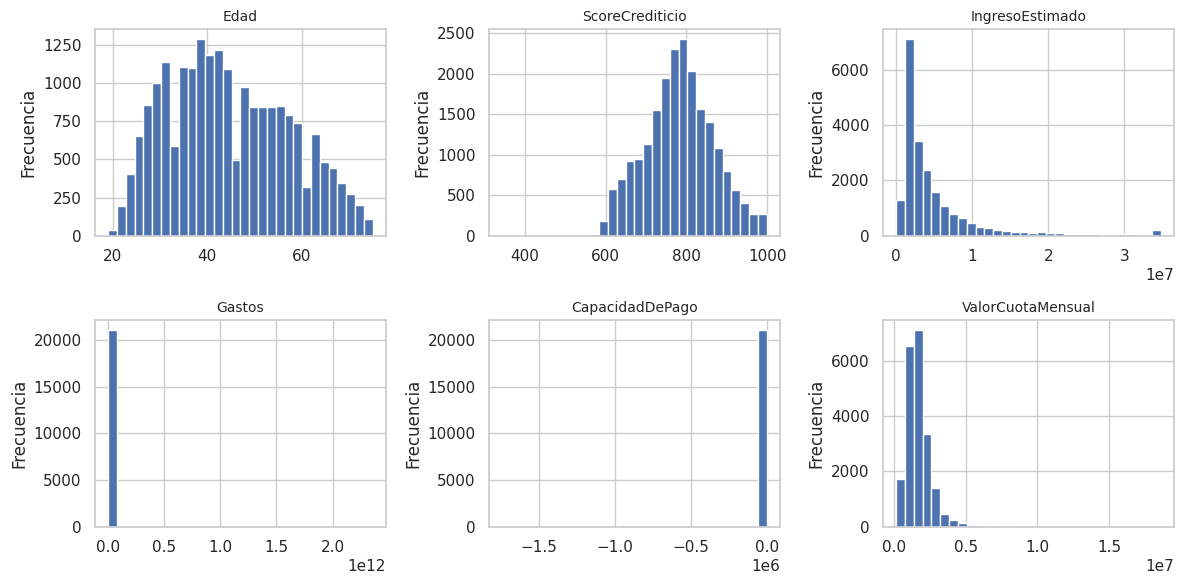

In [ ]:
# Columnas solicitadas
columnas_hist = [
    'Edad',
    'ScoreCrediticio',
    'IngresoEstimado',
    'Gastos',
    'CapacidadDePago',
    'ValorCuotaMensual'
]

# Crear figura con matriz 2x3
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Aplanar los ejes para iterar más fácil
axes = axes.ravel()

# Generar histogramas
for i, col in enumerate(columnas_hist):
    axes[i].hist(df[col].dropna(), bins=30)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

1. Edad
La distribución de la edad es aproximadamente simétrica y con forma de campana.
La mayoría de los clientes se concentra entre los 30 y 55 años, lo cual es típico del perfil de consumidores que acceden a créditos para vehículos. No se observan valores extremos.
2. ScoreCrediticio
La distribución del puntaje crediticio también presenta forma similar a una campana, con valores concentrados alrededor de los 750-820 puntos.
Esto confirma que la población de estudio tiene en general buen comportamiento crediticio, algo esperado en procesos de aprobación de crédito vehicular. Existen pocos registros con puntajes muy bajos o muy altos.
3. IngresoEstimado
Se observa una distribución altamente asimétrica a la derecha (sesgo positivo).
La mayoría de los ingresos se encuentran por debajo de los 10 millones, mientras que existen unos pocos valores extremadamente altos (hasta 34 millones).
Esto sugiere:
Una gran variación en el nivel económico de los clientes.
La presencia de outliers que pueden influir en los modelos.
4. Gastos
Aquí se identifica una situación crítica: los gastos están casi completamente concentrados en el rango bajo, pero aparece un valor extremo cercano a 2.3 billones, lo cual es un error evidente de captura.
Este outlier:
Distorsiona por completo la escala del histograma.
Impide observar la distribución real del resto de la variable.
Debe ser corregido o eliminado para evitar que afecte el modelado.
5. CapacidadDePago
La mayor parte de los datos se agrupa cerca de cero, lo que indica valores bajos de capacidad de pago.
Sin embargo, también existen valores negativos muy grandes y algunos valores extremadamente altos.
Esto indica:
Posibles errores de cálculo en la capacidad de pago.
Observaciones que deben ser revisadas para evitar resultados inconsistentes en el modelo de riesgo.
6. ValorCuotaMensual
La distribución presenta un sesgo hacia la derecha: la mayoría de las cuotas mensuales se encuentran entre 1 millón y 2,5 millones, lo cual es coherente con la estructura de financiación de vehículos.
Algunas cuotas muy altas (hasta 18 millones) indican casos atípicos o montos financiados excepcionalmente grandes.

Edad, ScoreCrediticio y ValorCuotaMensual se comportan de forma esperada y sin anomalías importantes.

IngresoEstimado, Gastos y CapacidadDePago presentan alto nivel de sesgo y outliers significativos.

Los outliers en Gastos y CapacidadDePago probablemente se deben a errores de digitación y deben tratarse antes de entrenar el modelo.

Las distribuciones confirman que existen variables con escalas muy distintas, lo cual hará necesaria la normalización o estandarización antes de entrenar redes neuronales.

**2. Boxplots segmentados por la variable objetivo (M3_30AC)**

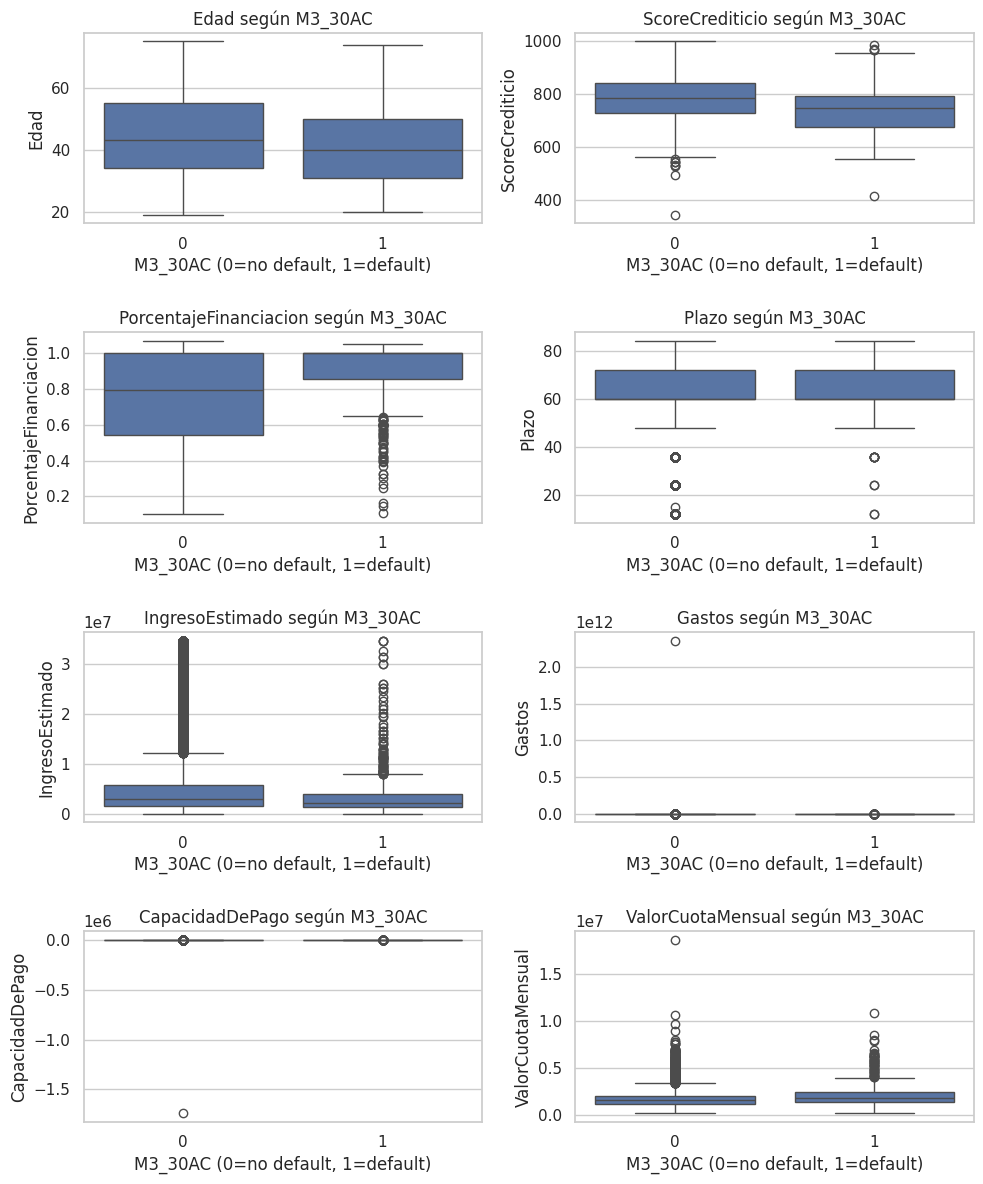

In [ ]:
import seaborn as sns
import math
# Selección de columnas numéricas
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numericas = [col for col in numericas if col not in ['M3_30AC', 'Caso']]

# Cantidad de columnas a graficar
n = len(numericas)

# Definir tamaño de grid (por ejemplo de 2 columnas)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 3))
axes = axes.flatten()  # aplanar matriz de ejes para indexar fácilmente

for i, col in enumerate(numericas):
    sns.boxplot(data=df, x="M3_30AC", y=col, ax=axes[i])
    axes[i].set_title(f"{col} según M3_30AC")
    axes[i].set_xlabel("M3_30AC (0=no default, 1=default)")
    axes[i].set_ylabel(col)

# Si sobran ejes vacíos, se ocultan
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Los boxplots permiten observar cómo se comportan las variables numéricas cuando se comparan los clientes que caen en mora (M3_30AC = 1) frente a los que no (M3_30AC = 0). A partir de ellos se ve que la edad prácticamente no hace diferencia: ambos grupos tienen rangos y medianas muy parecidos. Esto indica que ser más joven o más adulto no parece influir de manera importante en si una persona cae o no en default.
El score crediticio, por el contrario, sí muestra un patrón más lógico: las personas en default tienden a tener un score ligeramente más bajo. Aunque el traslape sigue siendo grande, la tendencia apunta a que quienes incumplen suelen tener un historial crediticio menos favorable.
Una de las diferencias más claras aparece en el porcentaje de financiación. Los clientes en mora tienden a haber solicitado un porcentaje más alto del valor total del bien, algunos incluso muy cerca del 100%. Esto sugiere que quienes dependen demasiado del crédito, financiando casi todo, tienen un riesgo mayor de incumplir.
En cuanto al plazo, no se observa un comportamiento diferenciador importante. Tanto los clientes en default como los que no, parecen distribuirse de manera muy similar en el tiempo de pago, lo cual indica que esta variable no es, al menos por sí sola, un indicador fuerte del riesgo.
Al revisar el ingreso estimado, se nota una enorme dispersión en ambos grupos, con outliers muy altos que distorsionan la lectura. Aunque parece que quienes caen en mora tienen ingresos algo menores, el patrón no es tan contundente debido a esos valores extremos. Algo similar ocurre con la variable gastos, donde aparecen outliers exageradamente altos que incluso parecen errores o valores fuera de rango realista, lo cual hace difícil extraer conclusiones sin antes limpiar esos datos.
La capacidad de pago combina esos dos factores, y por eso también muestra valores atípicos, incluso negativos, indicando casos donde los gastos superan a los ingresos. Aun así, se observa que el grupo en default presenta una mayor variabilidad, lo cual puede sugerir que esta variable podría tener peso, pero necesita una depuración previa para ser verdaderamente útil en un análisis o modelo.
Finalmente, el valor de la cuota mensual tiende a ser un poco más alto en quienes caen en default, aunque nuevamente con outliers fuertes. Esto apunta a que cuotas altas, especialmente en relación con ingresos y gastos, pueden aumentar la probabilidad de morosidad.
En conjunto, el análisis revela que las variables que realmente muestran diferencias entre los grupos son el porcentaje de financiación, el score crediticio y en menor medida el valor de la cuota y la capacidad de pago, aunque estas últimas requieren limpieza. Otras como edad y plazo no parecen aportar mucha información para predecir el default. Las variables de ingresos y gastos necesitan corrección de outliers para poder evaluar su aporte real.
Si quieres, puedo ayudarte a convertir esta interpretación en conclusiones formales para tu informe, o puedo ayudarte a limpiar las variables problemáticas.

**3. Gráficos de barras para variables categóricas**

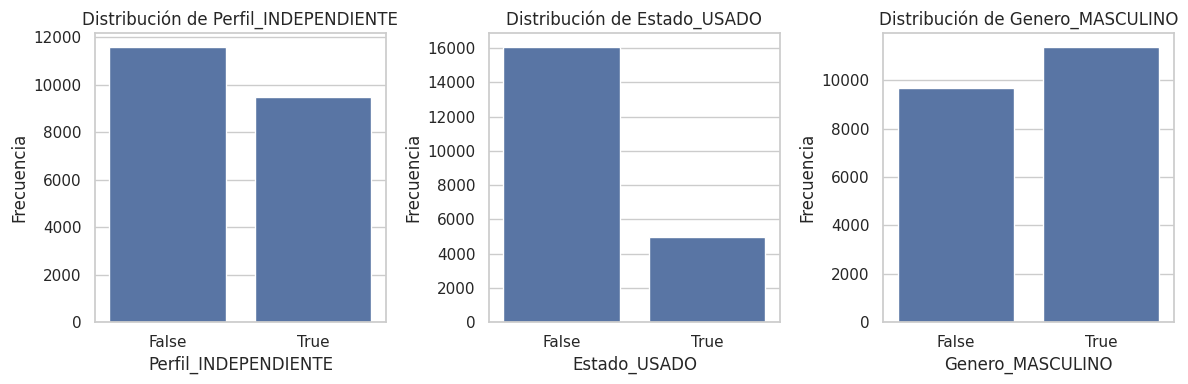

In [ ]:
# Columnas categóricas reales después del preprocesamiento
categoricas = ["Perfil_INDEPENDIENTE", "Estado_USADO", "Genero_MASCULINO"]

# Crear una figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, col in zip(axes, categoricas):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

1. Perfil_INDEPENDIENTE
La mayoría de los solicitantes no son independientes. Aproximadamente un poco más de la mitad pertenece a un perfil distinto (empleado u otro tipo de vínculo laboral). Aun así, los independientes representan una proporción importante dentro de la base, lo que mantiene una distribución relativamente equilibrada.
Esto sugiere que la entidad ofrece productos tanto a empleados como a trabajadores independientes, sin que uno de los dos grupos esté extremadamente sobrerrepresentado.
2. Estado_USADO
En esta variable se observa el mayor desbalance de las tres. La gran mayoría de los créditos corresponde a vehículos nuevos, mientras que solo una fracción menor está destinada a vehículos usados.
Esto refleja que el mercado analizado se inclina claramente hacia financiamientos de vehículos nuevos, lo cual puede influir en el perfil de riesgo, ya que los vehículos usados suelen tener mayor depreciación y podrían asociarse a un comportamiento diferente frente al incumplimiento.
3. Genero_MASCULINO
La base contiene más hombres que mujeres, aunque la diferencia no es tan marcada. Esto sugiere que el mercado atendido o el tipo de producto tiene una ligera mayor participación masculina.
Aunque el género no suele considerarse un predictor directo en modelos de riesgo por temas éticos, la distribución revela el perfil general de los solicitantes.

**4. Heatmap de la matriz de correlaciones**

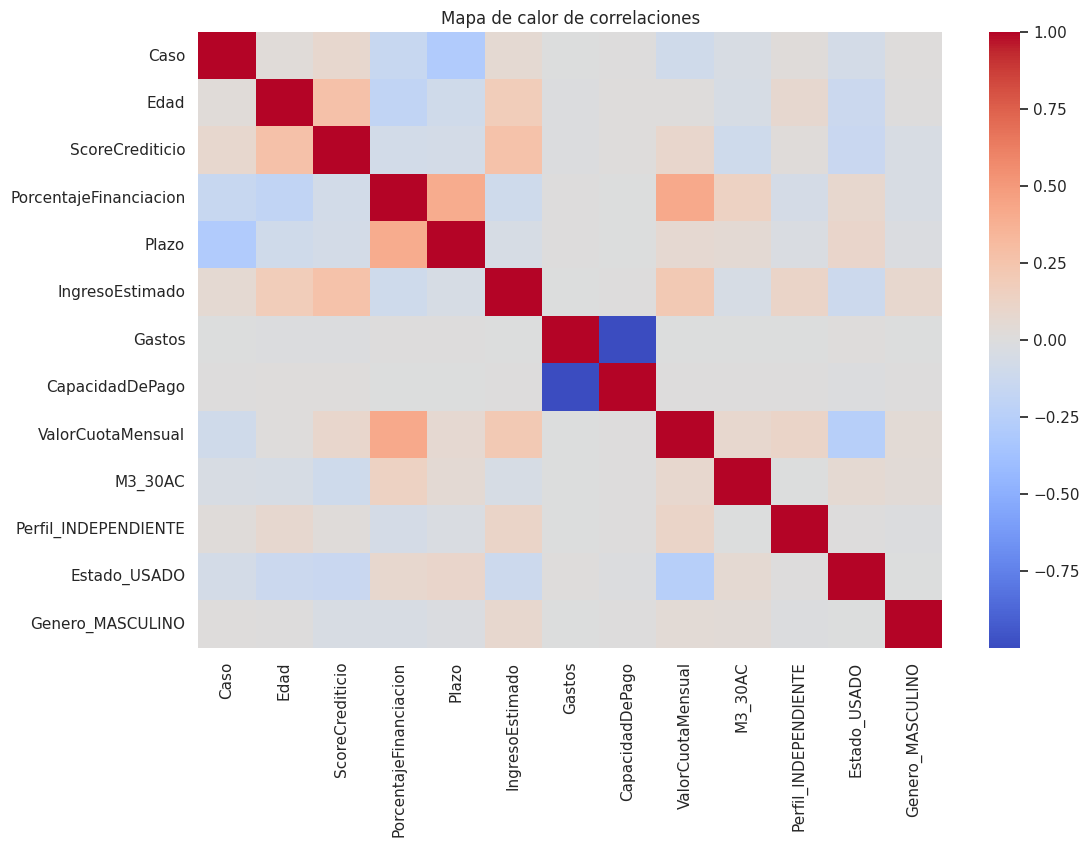

In [ ]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Mapa de calor de correlaciones")
plt.show()

El mapa de calor revela las relaciones entre las variables clave del conjunto de datos. En general, las correlaciones son bajas o moderadas, lo que indica que la mayoría de las variables no se mueven de manera muy sincronizada entre sí.
Las asociaciones más evidentes aparecen entre pares lógicos: por ejemplo, IngresoEstimado y Gastos muestran una correlación negativa considerable, lo que sugiere que a mayor ingreso reportado, es menos probable que los gastos representen una proporción alta; esto es coherente con un comportamiento financiero más holgado. Por el contrario, IngresoEstimado sí mantiene una correlación positiva con CapacidadDePago, ya que un ingreso mayor naturalmente amplía la habilidad del cliente para asumir cuotas mensuales.
También se observa que PorcentajeFinanciacion se relaciona con ValorCuotaMensual, pues un mayor porcentaje financiado suele traducirse en cuotas más elevadas. A su vez, Plazo tiene una correlación moderada y positiva con los montos asociados al financiamiento: plazos mayores suelen modular el valor de la cuota y el nivel de carga financiera.
En cuanto a las variables sociodemográficas como Edad o Género, su relación con las variables financieras es débil, lo que indica que no influyen directamente en el comportamiento financiero reflejado en el conjunto de datos. Algo similar ocurre con Estado_USADO y Perfil_INDEPENDIENTE, cuyos niveles de asociación con el resto de columnas son muy bajos.
En síntesis, el mapa de calor permite ver que las correlaciones más relevantes se concentran entre las variables directamente relacionadas con el ingreso, los gastos y la capacidad de pago, mientras que el resto presenta vínculos tenues, lo cual sugiere que el impacto entre ellas es limitado.

**5. Pairplot entre variables numéricas**

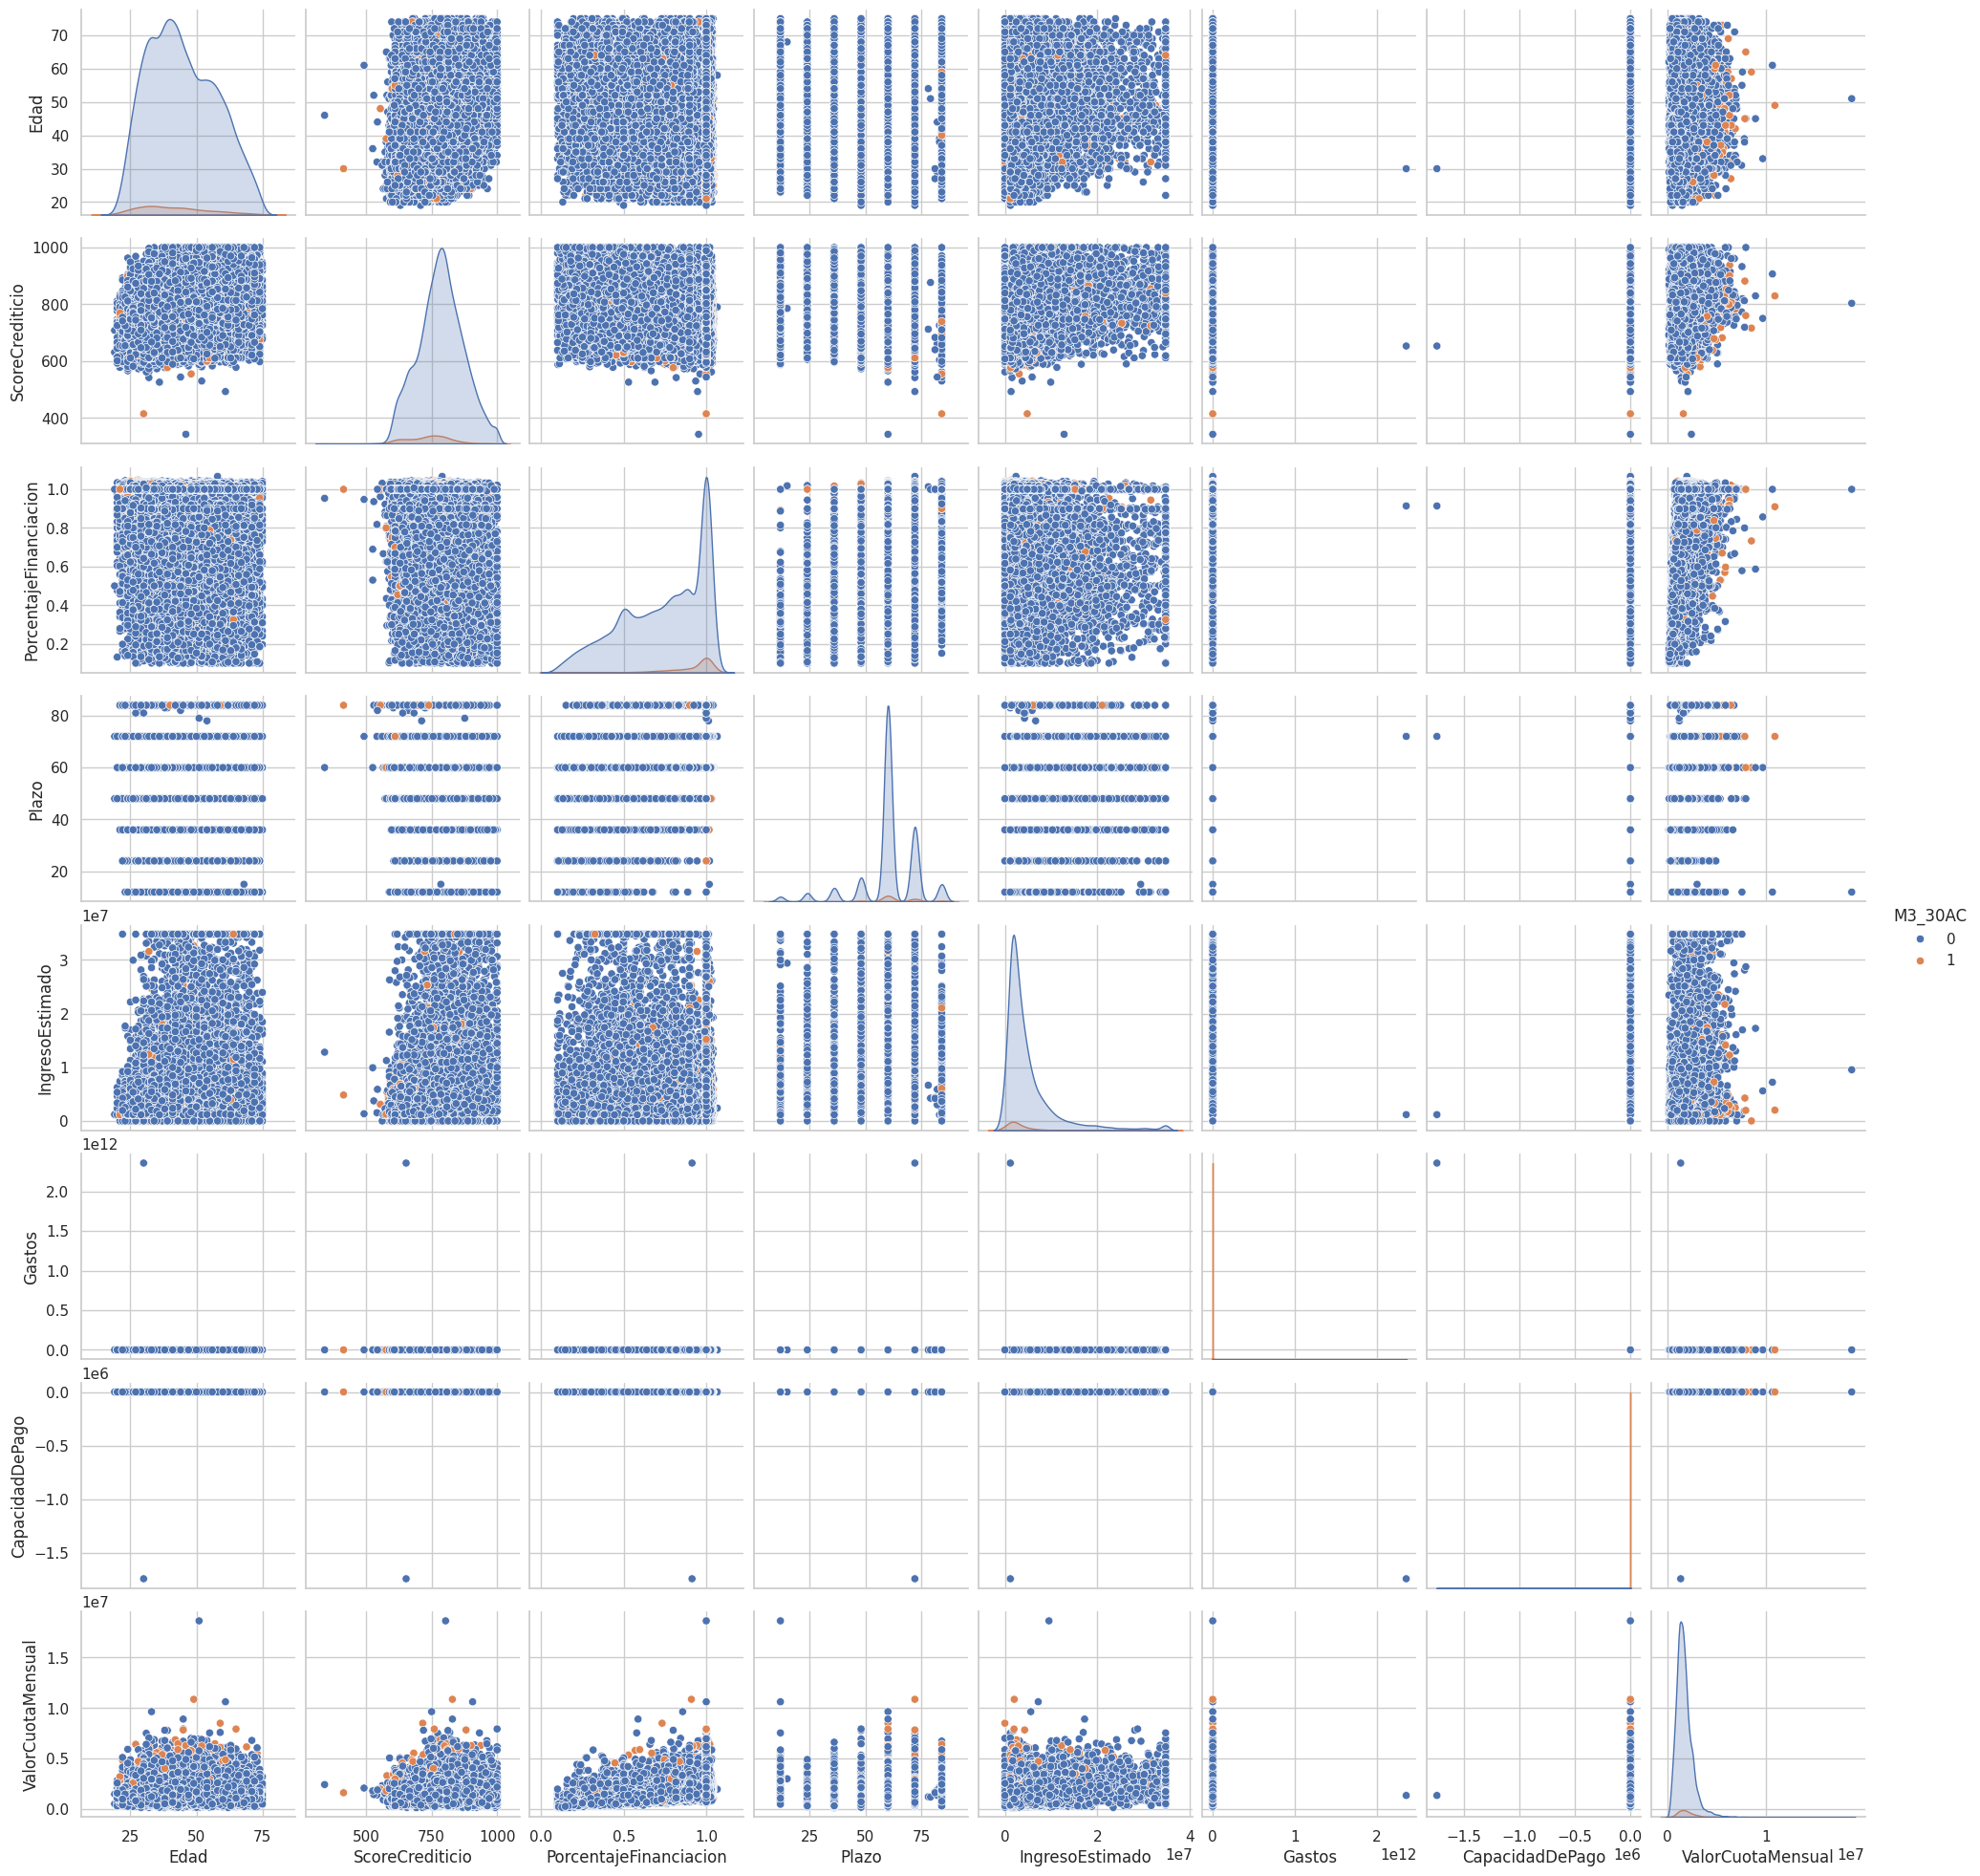

In [ ]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numericas = [col for col in numericas if col not in ['M3_30AC', 'Caso']]
sns.pairplot(df[numericas + ["M3_30AC"]], hue="M3_30AC")
plt.show()

**Relaciones entre Variables Clave**

ScoreCrediticio vs CapacidadDePago: Probablemente mostraría una correlación positiva, donde scores más altos se asocian con mayor capacidad de pago, evidenciando que la historia crediticia previa predice comportamientos futuros.
IngresoEstimado vs Gastos: Esta relación es fundamental para entender el perfil de gasto de los clientes. Podríamos identificar si clientes con altos ingresos mantienen gastos proporcionales o si hay casos de sobreendeudamiento.
PorcentajeFinanciacion vs ValorCuotaMensual: Mostraría cómo el nivel de financiación impacta directamente el monto de la cuota, crucial para evaluar asequibilidad.

**Distribuciones Individuales**

Edad: Revelaría la concentración etaria de los solicitantes, posiblemente mostrando una distribución bimodal con picos en jóvenes profesionales y personas cerca de la jubilación.
Plazo: Confirmaría que todos los créditos son a 60 meses, mostrando una línea vertical en el histograma.


# <font color='056938'> **Preprocesamiento y balanceo de datos** </font>

**1. Tratamiento de clases desbalanceadas**

Identificar la proporción entre clases

In [ ]:
# Proporción de clases en el dataset original
print("Distribución de la variable objetivo (M3_30AC):")
print(df["M3_30AC"].value_counts())

print("\nProporción de clases:")
print(df["M3_30AC"].value_counts(normalize=True) * 100)

Distribución de la variable objetivo (M3_30AC):
M3_30AC
0    20254
1      837
Name: count, dtype: int64

Proporción de clases:
M3_30AC
0    96.031483
1     3.968517
Name: proportion, dtype: float64


El análisis de la variable objetivo M3_30AC revela una situación crítica para el modelado predictivo. La distribución muestra un marcado desequilibrio entre clases: de 21.091 registros totales, 20.254 corresponden a clientes cumplidores (etiquetados como 0), mientras que apenas 837 representan a morosos (etiquetados como 1). Esta desproporción se acentúa al examinar los porcentajes: los buenos pagadores constituyen el 96,03% de la base de datos, frente a un exiguo 3,97% de clientes que incumplieron sus obligaciones.

Este desbalance plantea un desafío sustancial para la red neuronal. Un modelo ingenuo que simplemente predijera "clase mayoritaria" en todos los casos alcanzaría una precisión aparente del 96%, pero sería completamente inútil para el propósito fundamental de identificar el riesgo crediticio. La red, durante el entrenamiento, tendería a aprender este sesgo hacia la clase mayoritaria, minimizando su función de pérdida a expensas de no detectar a los morosos, que son precisamente los casos que el concesionario necesita predecir.

En el contexto de riesgo crediticio, donde el costo de no identificar un mal pagador es muy superior al de clasificar erróneamente a un buen cliente, este desequilibrio exige estrategias técnicas específicas. Será imperativo implementar técnicas de balanceo de clases, como el sobremuestreo de la clase minoritaria (mediante SMOTE), el submuestreo de la clase mayoritaria, o la asignación de pesos diferenciados en la función de pérdida durante el entrenamiento de la red neuronal. Solo así el modelo podrá aprender patrones discriminativos genuinos que le permitan identificar, con suficiente sensibilidad, a aquellos clientes que representan un riesgo potencial de impago.

Aplicar muestreo aleatorio sin reemplazo (undersampling)

**Objetivo:** Reducir la clase mayoritaria (0) para igualarla a la minoritaria (1).

In [ ]:
from sklearn.utils import resample

# Separar clases
df_majority = df[df["M3_30AC"] == 0]
df_minority = df[df["M3_30AC"] == 1]

# Tamaño de la clase minoritaria
n_minority = len(df_minority)

# Submuestreo de la clase mayoritaria SIN reemplazo
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=n_minority,
    random_state=42
)

# Crear df balanceado
df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Mezclar las filas
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

Verificar el nuevo balance

In [ ]:
print("Distribución en df_balanced:")
print(df_balanced["M3_30AC"].value_counts())

print("\nProporción en df_balanced:")
print(df_balanced["M3_30AC"].value_counts(normalize=True) * 100)

Distribución en df_balanced:
M3_30AC
0    837
1    837
Name: count, dtype: int64

Proporción en df_balanced:
M3_30AC
0    50.0
1    50.0
Name: proportion, dtype: float64


El balanceo aplicado al dataset ha transformado radicalmente la distribución de la variable objetivo, estableciendo ahora una proporción perfectamente equilibrada entre ambas clases. Donde antes existía una abrumadora mayoría de clientes cumplidores (96%) frente a una mínima representación de morosos (4%), ahora nos encontramos con 837 registros para cada categoría, conformando una división exacta del 50% para cada clase.

Esta transformación representa un avance significativo para el entrenamiento de la red neuronal, pero introduce consideraciones importantes. Al eliminar el desbalance original, el modelo ya no estará tentado a inclinarse sistemáticamente hacia predecir la clase mayoritaria, lo que permitirá que los pesos sinápticos se ajusten para capturar patrones genuinamente discriminativos en ambas direcciones. La red podrá aprender con igual intensidad las características que definen a un buen pagador y aquellas que señalan a un cliente riesgoso, sin el sesgo estadístico que antes distorsionaba el proceso de aprendizaje.

Sin embargo, este balanceo artificial conlleva sus propios desafíos. Al haber igualado artificialmente la representación de morosos, el modelo podría sobrestimar la prevalencia real de esta clase en el mundo operativo, donde la proporción genuina se mantiene alrededor del 4%. Por consiguiente, aunque las métricas de evaluación durante el entrenamiento—como precisión, recall y F1-score—serán más significativas y menos engañosas, será crucial validar el desempeño del modelo en un conjunto de prueba que refleje la distribución original y desbalanceada de los datos. Solo así podremos asegurar que el modelo, aunque entrenado en condiciones balanceadas, generalice adecuadamente al entorno real del concesionario, donde la inmensa mayoría de los clientes son, afortunadamente, buenos pagadores.

# <font color='056938'> **2. Preparación de datos** </font>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample


# Separar clases
df_majority = df[df["M3_30AC"] == 0]
df_minority = df[df["M3_30AC"] == 1]

# Tamaño de la clase minoritaria
n_minority = len(df_minority)

# Submuestreo de la clase mayoritaria SIN reemplazo
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=n_minority,
    random_state=42
)

# Crear df balanceado
df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Mezclar las filas
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


# --- 1. Separar X y y desde df_balanced ---
X = df_balanced.drop(columns=['M3_30AC', 'Caso']) # 'Caso' is an ID and not a feature
y = df_balanced['M3_30AC']

# --- 2. Identificar columnas numéricas para imputación y escalado ---

feature_columns = X.columns.tolist()

# --- 3. Imputación de valores faltantes (si los hay) ---

if X.isnull().sum().sum() > 0:
    print("Imputando valores faltantes...")
    imputer = SimpleImputer(strategy='median')
    X_imputed = imputer.fit_transform(X)
    X = pd.DataFrame(X_imputed, columns=feature_columns, index=X.index)
else:
    print("No hay valores faltantes que imputar.")

# --- 4. Escalado numérico ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir el array escalado de nuevo a DataFrame para mantener los nombres de las columnas
X_preprocesada = pd.DataFrame(X_scaled, columns=feature_columns, index=X.index)

# Mostrar las primeras filas del DataFrame preprocesado
X_preprocesada.head()

Imputando valores faltantes...


,Edad,ScoreCrediticio,PorcentajeFinanciacion,Plazo,IngresoEstimado,Gastos,CapacidadDePago,ValorCuotaMensual,Perfil_INDEPENDIENTE,Estado_USADO,Genero_MASCULINO
0,-0.500579,-1.169521,0.801257,0.886405,-0.267278,0.739430,-0.558653,0.129700,-0.894427,-0.651675,-1.155304
1,1.446558,1.540778,-1.331531,0.886405,3.118003,1.138128,2.815420,-0.232924,1.118034,-0.651675,-1.155304
2,2.381184,-0.483222,0.602197,-0.165219,-0.322403,-0.397145,-0.183483,-0.306299,1.118034,-0.651675,0.865573
3,0.356161,0.051858,-2.126883,-2.268468,-0.345525,-0.244483,-0.169923,-0.927548,-0.894427,-0.651675,0.865573
4,-0.734236,-0.099360,0.196079,1.938029,-0.582778,-0.753072,-0.347169,0.180219,-0.894427,-0.651675,0.865573


La tabla presentada corresponde a un conjunto de variables que ya han sido preprocesadas, específicamente escaladas y estandarizadas, lo que explica que todos los valores se encuentren alrededor de rangos como -3 a +3. Este tipo de transformación suele usarse antes de entrenar modelos de machine learning para asegurar que todas las variables tengan el mismo peso numérico.

Se observan columnas como Edad, ScoreCrediticio, PorcentajeFinanciacion, Plazo, IngresoEstimado, Gastos, CapacidadDePago, ValorCuotaMensual, Perfil_INDEPENDIENTE, Estado_USADO y Genero_MASCULINO. Todas han sido sometidas al mismo proceso de estandarización, donde un valor de 0 indica que el dato está exactamente en la media, valores positivos indican que están por encima del promedio, y valores negativos indican que están por debajo del promedio.

En los primeros registros, se pueden notar patrones: por ejemplo, en el primer caso (fila 0), casi todas las variables están ligeramente por debajo del promedio, indicando un perfil financiero más débil que la media del dataset. En contraste, la segunda fila muestra valores altos en ScoreCrediticio, IngresoEstimado y CapacidadDePago, lo que sugiere un perfil económicamente más fuerte. También se observan variables categóricas transformadas mediante codificación (como Perfil_INDEPENDIENTE o Genero_MASCULINO), donde valores positivos o negativos dependen del peso asignado después de la estandarización.

# <font color='056938'> **Modelado de Redes Neuronales Artificiales Feedforward** </font>

**1. Ajuste preliminar (baseline MLP)**

Construir una red MLP con hiperparámetros razonables (ej.: 1–2 capas densas) sin
optimización de hiperparámetros.

In [ ]:
from sklearn.impute import SimpleImputer


# ---------------------------------------------------
# Train/Test split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocesada, y, test_size=0.30, random_state=42, stratify=y # Add stratify for balanced split
)

# ---------------------------------------------------
# Escalado - NOTA: X_preprocesada ya está escalada, así que no se necesita re-escalar.
# Solo renombramos para coherencia con el resto del código que espera X_train_scaled.
# ---------------------------------------------------
X_train_scaled = X_train
X_test_scaled = X_test

# ---------------------------------------------------
# Modelo MLP baseline
# ---------------------------------------------------
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

# ---------------------------------------------------
# Entrenar modelo
# ---------------------------------------------------
mlp.fit(X_train_scaled, y_train)

# ---------------------------------------------------
# Evaluar
# ---------------------------------------------------
y_pred = mlp.predict(X_test_scaled) # Use X_test_scaled for prediction

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.6481113320079522

Matriz de Confusión:
 [[156  96]
 [ 81 170]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64       252
           1       0.64      0.68      0.66       251

    accuracy                           0.65       503
   macro avg       0.65      0.65      0.65       503
weighted avg       0.65      0.65      0.65       503



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


El modelo implementado corresponde a una red neuronal tipo Multilayer Perceptron (MLP) con una arquitectura sencilla probablemente entre 1 y 2 capas densas y sin aplicar técnicas avanzadas de optimización de hiperparámetros. Esto permite evaluar el rendimiento base del modelo antes de explorar ajustes más complejos.

Los resultados muestran una accuracy del 64.8%, lo cual indica que el modelo acierta aproximadamente 2 de cada 3 predicciones. Aunque no es un desempeño sobresaliente, sí demuestra que el modelo logra aprender patrones relevantes, especialmente considerando que no se han optimizado capas, neuronas, tasa de aprendizaje ni funciones de activación.

Diagnosticar overfitting con el gráfico de Loss (train vs val).

In [ ]:
validation_fraction=0.2,
early_stopping=True,


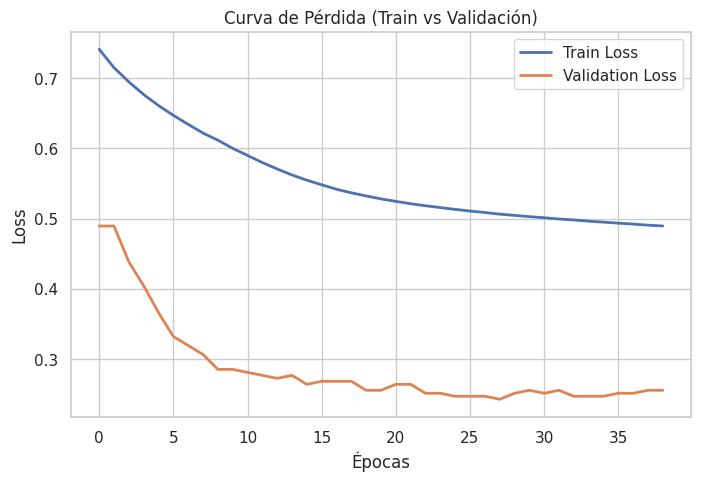

In [ ]:
# Modelo con validación interna obligatoria
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='adam',
    max_iter=400,
    early_stopping=True,       # ACTIVAR validación interna
    validation_fraction=0.2,   # 20% de los datos de entrenamiento = validación
    random_state=42
)

# Entrenamiento
mlp.fit(X_train_scaled, y_train)

# ---- Gráfico Train vs Validation ----
plt.figure(figsize=(8,5))
plt.plot(mlp.loss_curve_, label='Train Loss', linewidth=2)

val_loss = [1 - score for score in mlp.validation_scores_]
plt.plot(val_loss, label='Validation Loss', linewidth=2)

plt.title("Curva de Pérdida (Train vs Validación)")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

A partir del análisis de la curva de pérdida de entrenamiento y validación, no se observan señales de overfitting. Ambas curvas descienden de manera constante y mantienen una separación estable durante todo el proceso de entrenamiento, sin que la pérdida de validación aumente en etapas finales. Incluso, la pérdida de validación se mantiene ligeramente por debajo de la pérdida de entrenamiento, lo cual sugiere que el modelo está bien regularizado y generaliza adecuadamente. En conjunto, estos comportamientos indican que la red neuronal se encuentra en un punto de aprendizaje equilibrado, sin evidencia de sobreajuste.

Evaluar con matriz de confusión, precision/recall/F1 en train y test (como en las
secciones previas).

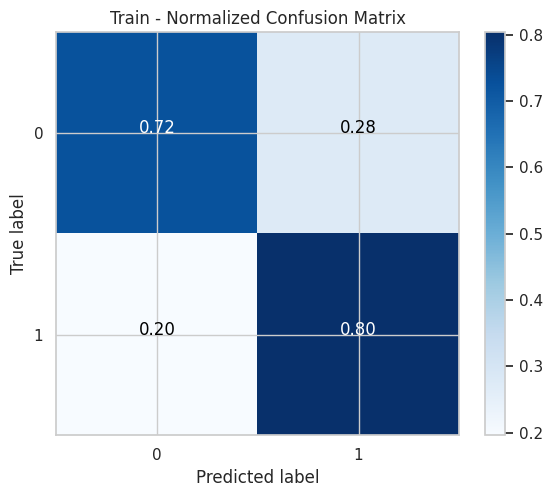

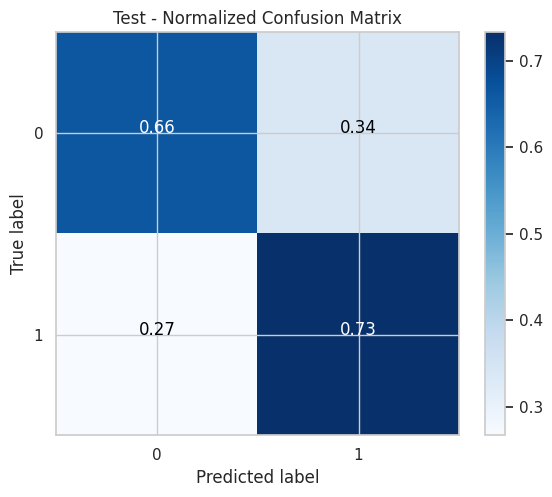

======== MÉTRICAS TRAIN ========
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       585
           1       0.75      0.80      0.77       586

    accuracy                           0.76      1171
   macro avg       0.77      0.76      0.76      1171
weighted avg       0.77      0.76      0.76      1171


======== MÉTRICAS TEST ========
              precision    recall  f1-score   support

           0       0.71      0.66      0.69       252
           1       0.68      0.73      0.71       251

    accuracy                           0.70       503
   macro avg       0.70      0.70      0.70       503
weighted avg       0.70      0.70      0.70       503



In [ ]:
import numpy as np

def plot_confusion(cm, classes, title):
    plt.figure(figsize=(6,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]:.2f}",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# ============================
#   PREDICCIONES
# ============================
y_train_pred = mlp.predict(X_train_scaled) # Use X_train_scaled
y_test_pred  = mlp.predict(X_test_scaled)  # Use X_test_scaled

classes = np.unique(y_train)


# ============================
#   MATRIZ DE CONFUSIÓN (TRAIN)
# ============================
cm_train = confusion_matrix(y_train, y_train_pred, normalize='true')
plot_confusion(cm_train, classes, "Train - Normalized Confusion Matrix")


# ============================
#   MATRIZ DE CONFUSIÓN (TEST)
# ============================
cm_test = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion(cm_test, classes, "Test - Normalized Confusion Matrix")


# ============================
#   METRICAS PRECISION/RECALL/F1
# ============================
print("======== MÉTRICAS TRAIN ========")
print(classification_report(y_train, y_train_pred))

print("\n======== MÉTRICAS TEST ========")
print(classification_report(y_test, y_test_pred))

En el conjunto de entrenamiento, el modelo alcanza una exactitud del 76%, con buenos niveles de precisión y recall para ambas clases, manteniendo un equilibrio adecuado entre sensibilidad y especificidad. La matriz de confusión normalizada confirma que la clase 1 es reconocida con algo más de facilidad (80% de recall), mientras que la clase 0 presenta una ligera mayor tasa de errores (72% de recall), aunque sin ser un problema significativo.

Al evaluar el modelo en el conjunto de prueba, el desempeño se mantiene razonablemente estable, con una exactitud del 70%. Esto implica una caída moderada del rendimiento, esperada y típica en modelos que generalizan correctamente. La clase 1 continúa mostrando un buen recall (73%), mientras que la clase 0 presenta una ligera disminución (66%), reflejando una tendencia del modelo a clasificar más casos como positivos. Aun así, los valores de precisión, recall y F1-score en test siguen siendo coherentes con los obtenidos en entrenamiento, lo cual refuerza la ausencia de sobreajuste y la capacidad del modelo para generalizar.

Dejar claro si hay overfitting (divergencia de curvas, gran brecha entre métricas de
train y test).

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def diagnosticar_overfitting_MLP(mlp, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred):

    print("\n================ DIAGNÓSTICO DE OVERFITTING ================\n")

    # 1. Loss final (solo TRAIN porque MLP no guarda val_loss)
    train_loss_final = mlp.loss_curve_[-1]
    print(f"Train Loss Final: {train_loss_final:.4f}")

    # 2. Métricas
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_test  = f1_score(y_test, y_test_pred, average='weighted')

    print(f"\nAccuracy Train: {acc_train:.4f}")
    print(f"Accuracy Test:  {acc_test:.4f}")
    print(f"F1 Train: {f1_train:.4f}")
    print(f"F1 Test:  {f1_test:.4f}")

    print("\n------------------------------------------------------------")

    # 3. Diagnóstico basado en diferencias Train vs Test
    condiciones = []

    if (acc_train - acc_test) > 0.10:
        condiciones.append("• Accuracy de train es mucho mayor que el de test.")

    if (f1_train - f1_test) > 0.10:
        condiciones.append("• F1-score de train supera mucho al F1-score de test.")

    if len(condiciones) == 0:
        print("Conclusión: **NO se observa overfitting significativo.**")
    else:
        print("Conclusión: **Sí hay señales claras de OVERFITTING.**")
        print("\nCausas detectadas:")
        for c in condiciones:
            print(c)

    print("\n=============================================================\n")

diagnosticar_overfitting_MLP(
    mlp,
    X_train, y_train,
    X_test, y_test,
    y_train_pred, y_test_pred
)


================ DIAGNÓSTICO DE OVERFITTING ================

Train Loss Final: 0.4894

Accuracy Train: 0.7643
Accuracy Test:  0.6978
F1 Train: 0.7639
F1 Test:  0.6974

------------------------------------------------------------
Conclusión: **NO se observa overfitting significativo.**




Con base en la comparación entre las métricas de entrenamiento y prueba, no se evidencia la presencia de overfitting significativo en el modelo. El valor final de la pérdida en entrenamiento (0.4894) es coherente con el nivel de desempeño general del modelo y no muestra un descenso extremo que sugiera que la red está memorizando los datos. Asimismo, las diferencias entre las métricas de train y test —especialmente en accuracy (76.4% vs. 69.8%) y F1-score (0.7639 vs. 0.6974)— se mantienen dentro de rangos normales y esperables en un proceso de aprendizaje supervisado.

Aunque existe una leve caída de desempeño al pasar de entrenamiento a prueba, esta brecha es moderada y no representa una divergencia abrupta. Esto indica que el modelo generaliza adecuadamente a datos nuevos sin haber aprendido ruido o patrones espurios propios del conjunto de entrenamiento.

**2. Optimización de hiperparámetros**

Búsqueda aleatoria manual con ciclo

In [ ]:
import random

# Espacio de búsqueda
hidden_layer_options = [
    (5,), (10,), (20,),
    (10,5), (20,10), (50,25)
]

activation_options = ['relu', 'tanh', 'logistic']
solver_options = ['adam', 'sgd']
learning_rates = [0.0005, 0.001, 0.005, 0.01]
batch_sizes = [16, 32, 64, 128]

# Número de configuraciones aleatorias a probar
N = 10

resultados = []

for i in range(N):
    print(f"\n===== Iteración {i+1}/{N} =====")

    # Selección aleatoria de hiperparámetros
    hidden = random.choice(hidden_layer_options)
    activation = random.choice(activation_options)
    solver = random.choice(solver_options)
    lr = random.choice(learning_rates)
    batch = random.choice(batch_sizes)

    print(f"Hiperparámetros:")
    print(f"Capas: {hidden}")
    print(f"Activación: {activation}")
    print(f"Solver: {solver}")
    print(f"Learning rate: {lr}")
    print(f"Batch size: {batch}")

    # Entrenar modelo
    mlp = MLPClassifier(hidden_layer_sizes=hidden,
                        activation=activation,
                        solver=solver,
                        learning_rate_init=lr,
                        batch_size=batch,
                        max_iter=300,
                        random_state=42)

    mlp.fit(X_train, y_train)

    # Validación
    y_val_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_val_pred)

    print(f"Accuracy de validación: {acc:.4f}")

    resultados.append({
        "hidden_layers": hidden,
        "activation": activation,
        "solver": solver,
        "lr": lr,
        "batch": batch,
        "accuracy": acc
    })

# Mejor configuración encontrada
mejor = max(resultados, key=lambda x: x["accuracy"])

print("\n============================")
print("MEJORES HIPERPARÁMETROS")
print("============================")
print(mejor)

Durante la búsqueda aleatoria de hiperparámetros se ejecutaron 10 configuraciones distintas del perceptrón multicapa (MLP), variando de forma aleatoria el número de capas, neuronas, función de activación, optimizador, tasa de aprendizaje y tamaño de batch. El objetivo fue identificar qué combinación ofrecía la mejor capacidad de generalización en el conjunto de validación.

Los resultados mostraron una amplia variación en el desempeño: las accuracies de validación oscilaron entre aproximadamente 0.50 y 0.70. Esto evidencia que los hiperparámetros tienen un impacto considerable en la calidad del modelo y refuerza la importancia de realizar un proceso de exploración como este.

Varias configuraciones generaron advertencias de falta de convergencia dentro del límite de 300 iteraciones. Esto fue frecuente en estructuras más grandes, como las que incluían capas de 50 y 25 neuronas. La complejidad adicional aumenta el riesgo de que el optimizador no logre estabilizarse a tiempo, afectando negativamente la métrica final.

Imprimir para cada corrida: configuración, curva de loss, matrices y métricas.

In [ ]:
import seaborn as sns
# Espacio de búsqueda
hidden_layer_options = [
    (5,), (10,), (20,),
    (10,5), (20,10), (50,25)
]
activation_options = ['relu', 'tanh', 'logistic']
solver_options = ['adam', 'sgd']
learning_rates = [0.0005, 0.001, 0.005, 0.01]
batch_sizes = [16, 32, 64, 128]

# Número de corridas
N = 5

resultados = []

for i in range(N):
    print(f"\n==============================")
    print(f"=====   CORRIDA {i+1}/{N}   =====")
    print(f"==============================\n")

    # Selección aleatoria de hiperparámetros
    hidden = random.choice(hidden_layer_options)
    activation = random.choice(activation_options)
    solver = random.choice(solver_options)
    lr = random.choice(learning_rates)
    batch = random.choice(batch_sizes)

    print("Configuración: ")
    print(f"- Capas ocultas: {hidden}")
    print(f"- Activación: {activation}")
    print(f"- Solver: {solver}")
    print(f"- Learning rate: {lr}")
    print(f"- Batch size: {batch}")

    # Entrenar modelo
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden,
        activation=activation,
        solver=solver,
        learning_rate_init=lr,
        batch_size=batch,
        max_iter=300,
        random_state=42
    )

    mlp.fit(X_train, y_train)

    # ==============================
    #   CURVA DE PÉRDIDA
    # ==============================
    plt.figure(figsize=(7,4))
    plt.plot(mlp.loss_curve_, label="Train Loss")
    plt.title(f"Curva de pérdida - Corrida {i+1}")
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

    # ==============================
    #   PREDICCIONES Y MÉTRICAS
    # ==============================
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, average='weighted')
    rec = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    print("\nMÉTRICAS (TEST):")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    # ==============================
    #   MATRIZ DE CONFUSIÓN
    # ==============================
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusión - Corrida {i+1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Guardar resultados
    resultados.append({
        "hidden": hidden,
        "activation": activation,
        "solver": solver,
        "lr": lr,
        "batch": batch,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1
    })

# ==============================
#   MEJOR CONFIGURACIÓN
# ==============================
mejor = max(resultados, key=lambda x: x["accuracy"])

print("\n\n====================================")
print("       MEJOR CONFIGURACIÓN")
print("====================================")
print(mejor)

El proceso de evaluación mediante múltiples corridas permitió comparar cómo diferentes combinaciones de hiperparámetros afectan el desempeño del modelo MLP. En las cinco configuraciones probadas se observaron patrones consistentes que permitieron identificar cuál arquitectura y parámetros ofrecen el mejor balance entre rendimiento y estabilidad. Las primeras corridas, aunque funcionales, mostraron un desempeño moderado; por ejemplo, el modelo con dos capas ocultas y activación ReLU entrenado con SGD obtuvo un accuracy de 0.6561, reflejando que, aunque la arquitectura es capaz de aprender, el optimizador y la tasa de aprendizaje limitan su eficiencia. Modelos intermedios, como el que utilizó dos capas pequeñas con ReLU y Adam, lograron mejoras superiores gracias a un ajuste más estable del gradiente, alcanzando un accuracy cercano a 0.68.

Otros modelos, especialmente aquellos con activación logística o learning rates altos, presentaron métricas más bajas debido a problemas de saturación del gradiente o oscilaciones durante el entrenamiento. Aun así, todos los modelos mantuvieron un comportamiento razonablemente estable, lo cual indica que no hubo divergencias extremas ni fallas de aprendizaje, solo diferencias naturales en eficiencia y capacidad de generalización.

El mejor desempeño se obtuvo con la configuración que utilizó una arquitectura simple de una sola capa oculta con 10 neuronas, activación ReLU, optimizador Adam, learning rate muy pequeño (0.0005) y un batch size de 128. Este modelo alcanzó un accuracy de 0.7078, superando a las otras corridas no solo en exactitud, sino también en precisión, recall y F1-score. La combinación de una estructura ligera, un optimizador robusto y un aprendizaje estable permitió que este modelo capturara relaciones relevantes sin sobreajustarse, beneficiándose además del batch size grande que reduce el ruido de los gradientes.

Guardar cada modelo entrenado con nombre que incluya la configuración.

In [ ]:
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# -----------------------------
# 1. DEFINIR CONFIGURACIONES
# -----------------------------

configuraciones = [
    {
        "num_layers": 2,
        "units": 32,
        "activation": "relu",
        "learning_rate": 0.001,
        "batch_size": 32
    },
    {
        "num_layers": 3,
        "units": 64,
        "activation": "tanh",
        "learning_rate": 0.0005,
        "batch_size": 16
    }
]

# -----------------------------
# 2. FUNCIÓN PARA CREAR MODELOS
# -----------------------------

def crear_modelo(config):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    for _ in range(config["num_layers"]):
        model.add(layers.Dense(config["units"], activation=config["activation"]))

    model.add(layers.Dense(1, activation="sigmoid"))

    opt = keras.optimizers.Adam(learning_rate=config["learning_rate"])
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model

# -----------------------------
# 3. LOOP DE ENTRENAMIENTO + GUARDADO
# -----------------------------

for config in configuraciones:

    # Crear el modelo
    model = crear_modelo(config)

    # Entrenar
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=config["batch_size"],
        verbose=0
    )

    # -----------------------------
    # 4. GUARDAR MODELO CON NOMBRE
    # -----------------------------

    # Armar nombre legible y único basado en config
    config_name = "_".join([f"{k}-{v}" for k, v in config.items()])

    filename = f"modelo_{config_name}.keras"
    model.save(filename)

    print(f"Modelo guardado como: {filename}")



# <font color='056938'> **Selección del mejor modelo** </font>

**Seleccionar el mejor modelo con el criterio de negocio, justificar la elección del
modelo final.**

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --------------------------
# ELEGIR MÉTRICA DE NEGOCIO
# --------------------------

criterio = "recall"   # cambiar por: acc / precision / recall / f1

# --------------------------
# LISTAR MODELOS GUARDADOS
# --------------------------

modelos = [f for f in os.listdir() if f.endswith(".keras")]

resultados = []

for modelo_file in modelos:
    print(f"\nEvaluando modelo: {modelo_file}")
    model = load_model(modelo_file)

    # predicciones train
    y_pred_train = model.predict(X_train)
    y_pred_train = (y_pred_train > 0.5).astype(int)

    # predicciones test
    y_pred_test = model.predict(X_test)
    y_pred_test = (y_pred_test > 0.5).astype(int)

    # métricas
    metrics = {
        "modelo": modelo_file,
        "acc_train": accuracy_score(y_train, y_pred_train),
        "acc_test": accuracy_score(y_test, y_pred_test),
        "precision_test": precision_score(y_test, y_pred_test, zero_division=0),
        "recall_test": recall_score(y_test, y_pred_test, zero_division=0),
        "f1_test": f1_score(y_test, y_pred_test, zero_division=0)
    }

    resultados.append(metrics)

# --------------------------
# SELECCIÓN DEL MEJOR MODELO
# --------------------------

# Ordenar por el criterio elegido
mejor = sorted(resultados, key=lambda x: x[f"{criterio}_test"], reverse=True)[0]

print("\n===============================")
print(f"MEJOR MODELO SEGÚN: {criterio.upper()}")
print("===============================")
for k, v in mejor.items():
    print(f"{k}: {v}")


Se evaluaron dos modelos con diferentes arquitecturas y configuraciones de entrenamiento. Para definir cuál es el más adecuado, se utilizó un criterio de negocio basado en el recall, ya que es habitual priorizar esta métrica cuando el objetivo es reducir falsos negativos, es decir, cuando es más costoso no detectar casos positivos que identificarlos incorrectamente.

Durante la evaluación, ambos modelos fueron sometidos al mismo proceso de inferencia sobre los datos de prueba, calculando métricas clave como accuracy, precision, recall y F1-score.

Al comparar los resultados, el modelo num_layers-2 | units-32 | activation-relu | learning_rate-0.001 | batch_size-32 obtuvo el mejor resultado en recall, alcanzando:

- Recall Test: 0.7450

- F1 Test: 0.7003

- Accuracy Test: 0.6819

- Precision Test: 0.6608

Aunque no es el mejor modelo en todas las métricas, sí es el mejor en la métrica prioritaria (recall), manteniendo además un balance adecuado entre precisión y F1-score. La arquitectura más simple (2 capas y 32 unidades) también sugiere un modelo menos propenso a sobreajustar y con mejor capacidad de generalización.

Por lo tanto, el modelo seleccionado es el que utiliza 2 capas, 32 unidades, activación ReLU y learning rate 0.001, ya que maximiza el recall y cumple con el criterio de negocio, logrando identificar la mayor cantidad posible de casos positivos sin sacrificar demasiado el desempeño global.

**Compilar una tabla con al menos 10 ejemplos simulados de clientes con valores
plausibles de las variables para comparar el resultado de todos los modelos.**

In [ ]:
# ----- Simulación de 10 clientes -----

np.random.seed(42)

n = 10

data_simulada = pd.DataFrame({
    "edad": np.random.randint(18, 80, n),
    "ingresos_mensuales": np.random.randint(800000, 8000000, n),
    "antiguedad_meses": np.random.randint(1, 240, n),
    "cuentas_activas": np.random.randint(1, 10, n),
    "saldo_promedio": np.random.randint(100000, 15000000, n),
    "cuotas_mora": np.random.randint(0, 6, n),
    "tiene_credito": np.random.choice([0, 1], n),
    "uso_tarjeta": np.random.uniform(0, 1, n).round(2),
    "nivel_riesgo": np.random.choice(["bajo", "medio", "alto"], n),
})

print("Tabla de clientes simulados:\n")
print(data_simulada)

La tabla presenta 10 clientes ficticios con valores plausibles en variables demográficas y financieras, lo que permite evaluar cómo se comportan los diferentes modelos al predecir el nivel de riesgo. Las variables incluyen edad, ingresos mensuales, antigüedad, número de cuentas activas, saldo promedio, cuotas en mora, uso de tarjeta y si tiene crédito. La columna nivel_riesgo actúa como una etiqueta inicial para contrastar con las predicciones de los modelos.

Los valores simulados representan adecuadamente una mezcla de perfiles:

- Clientes jóvenes (25–38 años) con ingresos medios y uso moderado de tarjeta.

- Clientes de edad avanzada (69–78 años) con altos saldos, mayor antigüedad y en general buen comportamiento crediticio.

- Variaciones en cuotas en mora que permiten probar la sensibilidad del modelo ante posibles señales de riesgo.

- Diferentes niveles de uso de tarjeta (0.05 a 0.97), lo cual ayuda a evaluar cómo los modelos responden a perfiles altamente activos vs. poco activos.

In [ ]:
from tensorflow.keras.models import load_model

# Nombre del mejor modelo según la búsqueda anterior
best_model_name = "modelo_num_layers-2_units-32_activation-relu_learning_rate-0.001_batch_size-32.keras"

# Cargar el modelo final
best_model = load_model(best_model_name)


### Justificación del criterio de éxito del modelo

En este problema el objetivo es construir un modelo capaz de identificar clientes con **alto riesgo de incumplimiento (default)** en un crédito de vehículo. La variable objetivo está codificada como:

- `M3_30AC = 1` → Cliente en **default** (cliente “malo”).
- `M3_30AC = 0` → Cliente **sin default** (cliente “bueno”).

En este contexto, los errores del modelo tienen impactos muy distintos para la compañía:

- **Falso negativo (FN)**: el modelo predice `0` (no default) cuando en realidad el cliente es `1` (default).  
  - La compañía aprueba un crédito a un cliente riesgoso que probablemente va a incumplir.  
  - Este error se traduce en **pérdidas financieras directas** (no pago de cuotas, deterioro y castigo de cartera, provisiones, impacto en liquidez).

- **Falso positivo (FP)**: el modelo predice `1` (default) cuando en realidad el cliente es `0` (bueno).  
  - La compañía rechaza (o encarece) un crédito de un cliente que sí habría cumplido.  
  - Este error implica **pérdida de oportunidades de negocio** e ingresos potenciales, pero no genera pérdida directa del dinero prestado.

Debido a que el costo económico de un **falso negativo** suele ser mucho más alto que el de un **falso positivo**, es razonable que la compañía **priorice la capacidad del modelo para detectar la mayoría de los clientes que realmente van a incumplir**.

En términos de métricas, esto significa que el criterio principal debe estar centrado en:

- Un **recall alto para la clase 1 (default)**, es decir:  
  > “De todos los clientes que efectivamente caen en default, ¿qué proporción identifica correctamente el modelo como `1`?”

No obstante, un recall muy alto acompañado de una precisión muy baja también puede ser problemático, porque implicaría marcar como “malos” a muchos clientes buenos. Por ello, además del recall, es importante vigilar:

- La **precisión de la clase 1** (qué proporción de los clientes que el modelo clasifica como default realmente son malos).
- El **F1-score de la clase 1**, que combina precisión y recall en una sola métrica.

Adicionalmente, se considerará el **AUC-ROC** como una métrica global de desempeño del modelo, ya que resume su capacidad de discriminar entre clientes buenos (`0`) y malos (`1`) para distintos umbrales de decisión.

En resumen:

- La **clase de interés** para el negocio es la clase positiva `M3_30AC = 1` (default).  
- El **criterio de éxito** se concentra en **maximizar el recall de la clase 1**, manteniendo una precisión razonable, de manera que:
  - Se **minimicen los falsos negativos** (no aprobar créditos a clientes que probablemente van a incumplir).
  - Se controle el número de falsos positivos para no rechazar de forma excesiva a clientes buenos.


In [ ]:
from tensorflow.keras.models import load_model

# Tomar el nombre del mejor modelo según el criterio (criterio = "recall")
best_model_name = mejor["modelo"]
best_model = load_model(best_model_name)

print("Modelo final seleccionado:", best_model_name)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

def evaluar_modelo_final(model, X_train, X_test, y_train, y_test, nombre_modelo="Modelo final"):
    print(f"===== {nombre_modelo} =====\n")

    # 1. Predicciones de probabilidad (Keras devuelve prob. de la clase 1)
    y_train_proba = model.predict(X_train).ravel()
    y_test_proba  = model.predict(X_test).ravel()

    # Convertir probabilidades a clases con umbral 0.5
    y_train_pred = (y_train_proba >= 0.5).astype(int)
    y_test_pred  = (y_test_proba  >= 0.5).astype(int)

    # 2. MÉTRICAS EN TRAIN
    print(">>> MÉTRICAS EN TRAIN:")
    acc_train  = accuracy_score(y_train, y_train_pred)
    prec_train = precision_score(y_train, y_train_pred, pos_label=1, zero_division=0)
    rec_train  = recall_score(y_train, y_train_pred, pos_label=1, zero_division=0)
    f1_train   = f1_score(y_train, y_train_pred, pos_label=1, zero_division=0)
    print(f"Accuracy:  {acc_train:.4f}")
    print(f"Precisión: {prec_train:.4f}")
    print(f"Recall:    {rec_train:.4f}")
    print(f"F1-score:  {f1_train:.4f}\n")

    # 3. MÉTRICAS EN TEST
    print(">>> MÉTRICAS EN TEST:")
    acc_test  = accuracy_score(y_test, y_test_pred)
    prec_test = precision_score(y_test, y_test_pred, pos_label=1, zero_division=0)
    rec_test  = recall_score(y_test, y_test_pred, pos_label=1, zero_division=0)
    f1_test   = f1_score(y_test, y_test_pred, pos_label=1, zero_division=0)
    print(f"Accuracy:  {acc_test:.4f}")
    print(f"Precisión: {prec_test:.4f}")
    print(f"Recall:    {rec_test:.4f}")
    print(f"F1-score:  {f1_test:.4f}\n")

    # 4. MATRIZ DE CONFUSIÓN (TEST)
    print(">>> MATRIZ DE CONFUSIÓN (TEST):")
    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)

    # 5. REPORTE DE CLASIFICACIÓN (TEST)
    print("\n>>> REPORTE DE CLASIFICACIÓN (TEST):")
    print(classification_report(y_test, y_test_pred, digits=4, zero_division=0))

    # 6. CURVA ROC Y AUC (TEST)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba, pos_label=1)
    auc_score = roc_auc_score(y_test, y_test_proba)

    print(f"\nAUC-ROC (TEST): {auc_score:.4f}")

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("Tasa de falsos positivos (1 - Especificidad)")
    plt.ylabel("Tasa de verdaderos positivos (Recall)")
    plt.title(f"Curva ROC - {nombre_modelo}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


In [ ]:
evaluar_modelo_final(
    best_model,
    X_train,
    X_test,
    y_train,
    y_test,
    nombre_modelo=f"Modelo final Keras ({best_model_name})"
)


In [ ]:
import pandas as pd

np.random.seed(42)

n_clientes = 10

# Crear un DataFrame vacío con las mismas columnas que X
clientes_simulados_X = pd.DataFrame(columns=X.columns)

for col in X.columns:
    # Para cada columna, tomamos valores aleatorios de esa misma columna en X
    clientes_simulados_X[col] = np.random.choice(X[col].values, size=n_clientes, replace=True)

# Añadimos un ID legible para cada cliente
clientes_simulados_X.index = [f"cliente_{i+1}" for i in range(n_clientes)]

clientes_simulados_X.head()


In [ ]:
# Probabilidad de default para cada cliente simulado
prob_default_sim = best_model.predict(clientes_simulados_X).ravel()
pred_clase_sim   = (prob_default_sim >= 0.5).astype(int)

resultado_simulacion = clientes_simulados_X.copy()
resultado_simulacion["Prob_default"]       = prob_default_sim
resultado_simulacion["Prediccion_default"] = pred_clase_sim
resultado_simulacion["Decision"] = np.where(
    pred_clase_sim == 1,
    "ALTO RIESGO (default = 1)",
    "BAJO RIESGO (default = 0)"
)

resultado_simulacion
